In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

1. Загрузка и предварительный анализ данных:
   - Загрузите данные из предоставленного файла `fetch_california_housing.xlsx`.
   - Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.



In [108]:
df = pd.read_excel('fetch_california_housing.xlsx')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [110]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


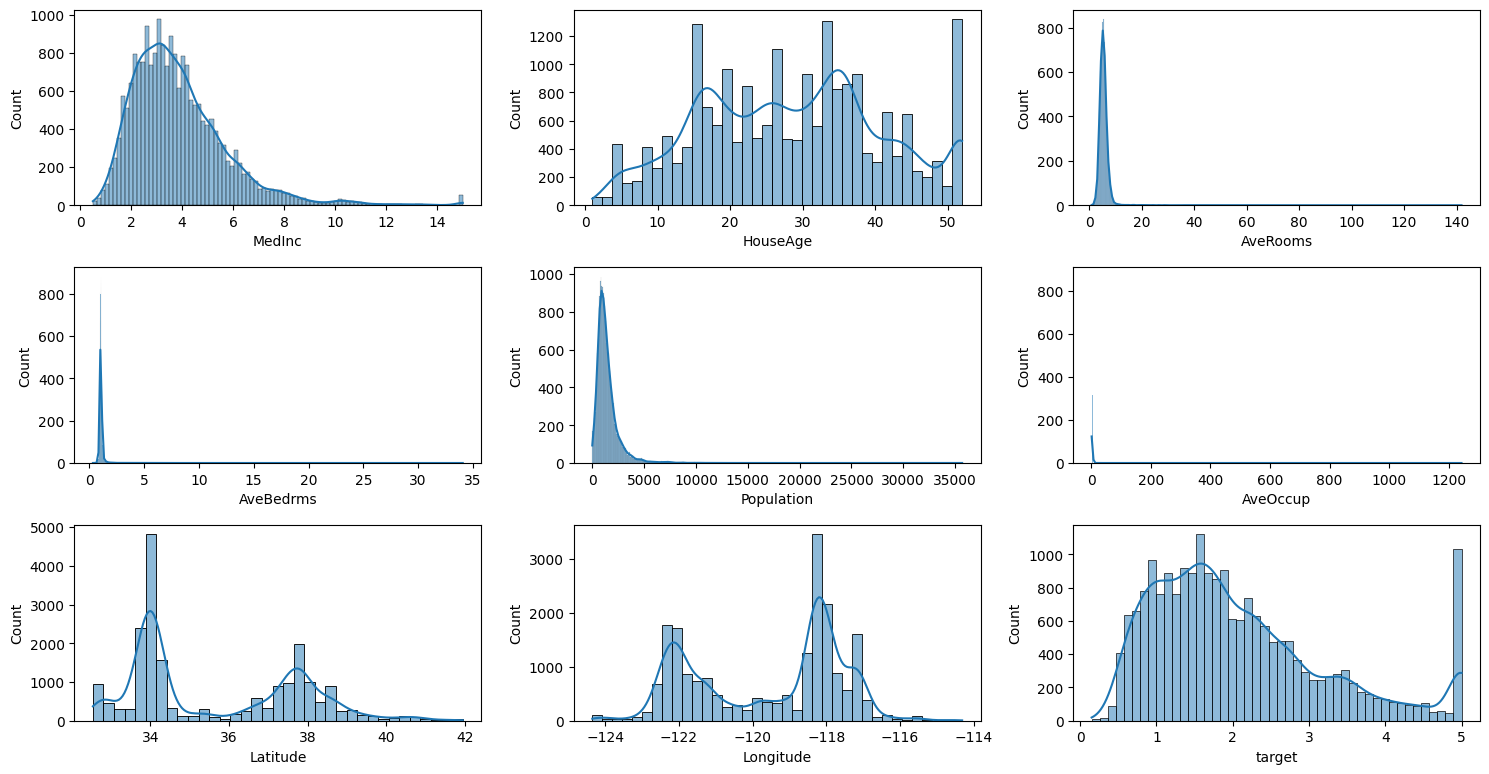

In [111]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()


#### есть выбросы в колонках ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
#### также желательно провести нормализацию данных, т.к. средние значения отличаются более чем в 100 раз (3 vs 1425)

## 2. Предобработка данных:
   - Очистите данные от возможных аномалий и пропущенных значений.
   


In [112]:
# пропущенных значений нет
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [113]:
# удаляем выбросы
drp_list = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df_filtered = df.copy()
for col in drp_list:
    q = df[col].quantile(0.99)
    df_filtered = df_filtered[df_filtered[col] < q]

df_filtered.info()




<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20000 non-null  float64
 1   HouseAge    20000 non-null  int64  
 2   AveRooms    20000 non-null  float64
 3   AveBedrms   20000 non-null  float64
 4   Population  20000 non-null  int64  
 5   AveOccup    20000 non-null  float64
 6   Latitude    20000 non-null  float64
 7   Longitude   20000 non-null  float64
 8   target      20000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.5 MB


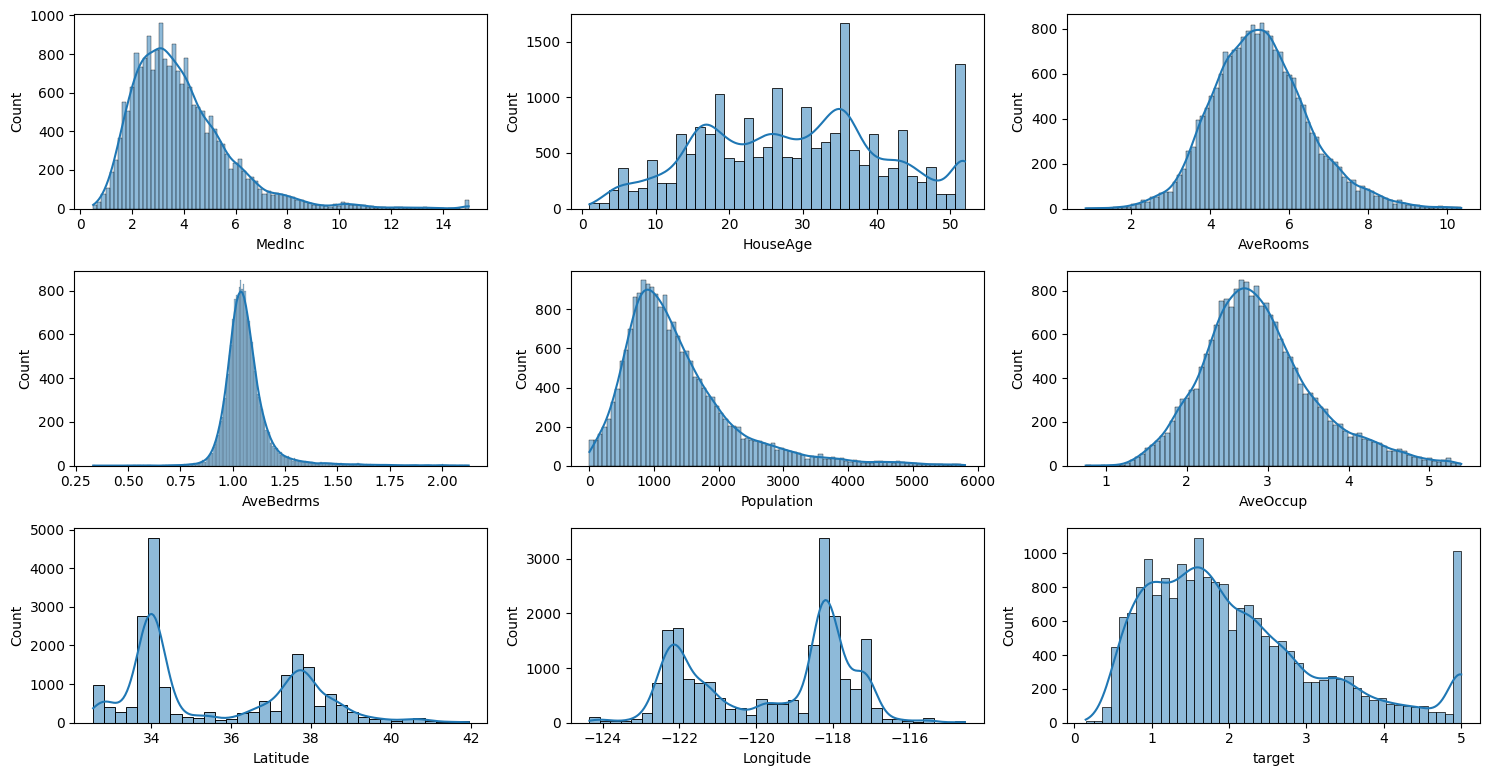

In [114]:
# визуализируем отфильтрованные данные
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_filtered.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_filtered[column], kde=True)

plt.tight_layout()
plt.show()

In [115]:
df_filtered.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.870577,28.909100,5.277458,1.064479,1364.192950,2.892244,35.628205,-119.585477,2.076608
std,1.893184,12.497878,1.224835,0.116679,863.012377,0.695103,2.130845,2.003005,1.157881
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,19.000000,4.436876,1.005039,792.000000,2.428321,33.930000,-121.810000,1.194000
50%,3.534100,29.000000,5.214522,1.047700,1163.000000,2.813548,34.250000,-118.500000,1.811000
75%,4.747575,37.000000,6.013062,1.096903,1701.000000,3.267996,37.710000,-118.020000,2.662000
max,15.000100,52.000000,10.352941,2.127208,5804.000000,5.392954,41.950000,-114.550000,5.000010


<Axes: xlabel='AveBedrms'>

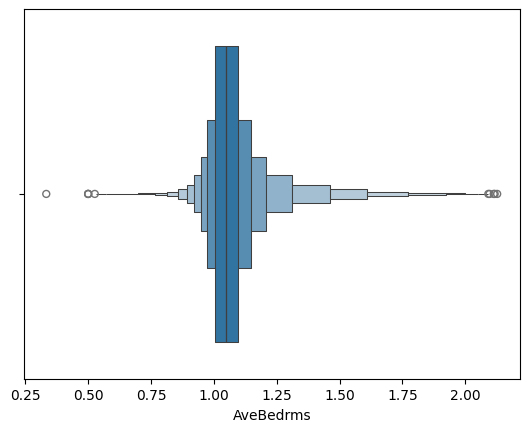

In [116]:
sns.boxenplot(x = df_filtered['AveBedrms'])


<Axes: xlabel='AveRooms'>

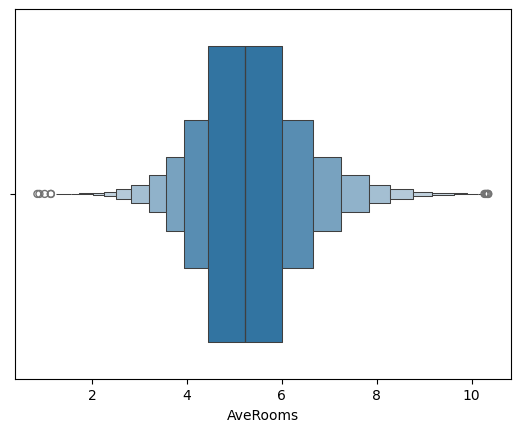

In [117]:
sns.boxenplot(x = df_filtered['AveRooms'])

<Axes: xlabel='Population'>

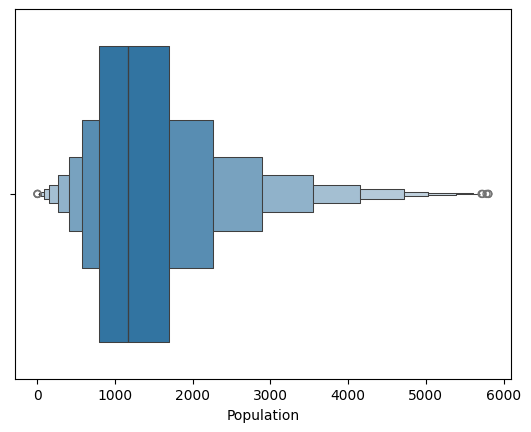

In [118]:
sns.boxenplot(x = df_filtered['Population'])

#### видим, что отфильтровано всего 640 значений, при этом распределения в других моделях изменились не значительно
#### после очистки структурно изменилось распределение по колонке 'HouseAge', а 'AveOccup' стал выглядеть как нормальное распределение

In [119]:
# проверим на корреляцию
df_filtered.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.117686,0.679402,-0.190713,-0.013959,-0.065668,-0.078112,-0.016969,0.691061
HouseAge,-0.117686,1.000000,-0.212222,-0.119409,-0.303779,-0.010280,0.011943,-0.103203,0.106935
AveRooms,0.679402,-0.212222,1.000000,0.212658,-0.071483,-0.017688,0.118704,-0.080114,0.334210
AveBedrms,-0.190713,-0.119409,0.212658,1.000000,-0.027275,-0.117605,0.064387,0.006795,-0.097694
Population,-0.013959,-0.303779,-0.071483,-0.027275,1.000000,0.205790,-0.117809,0.111503,-0.035643
AveOccup,-0.065668,-0.010280,-0.017688,-0.117605,0.205790,1.000000,-0.169621,0.184750,-0.287777
Latitude,-0.078112,0.011943,0.118704,0.064387,-0.117809,-0.169621,1.000000,-0.928869,-0.144261
Longitude,-0.016969,-0.103203,-0.080114,0.006795,0.111503,0.184750,-0.928869,1.000000,-0.044177
target,0.691061,0.106935,0.334210,-0.097694,-0.035643,-0.287777,-0.144261,-0.044177,1.000000


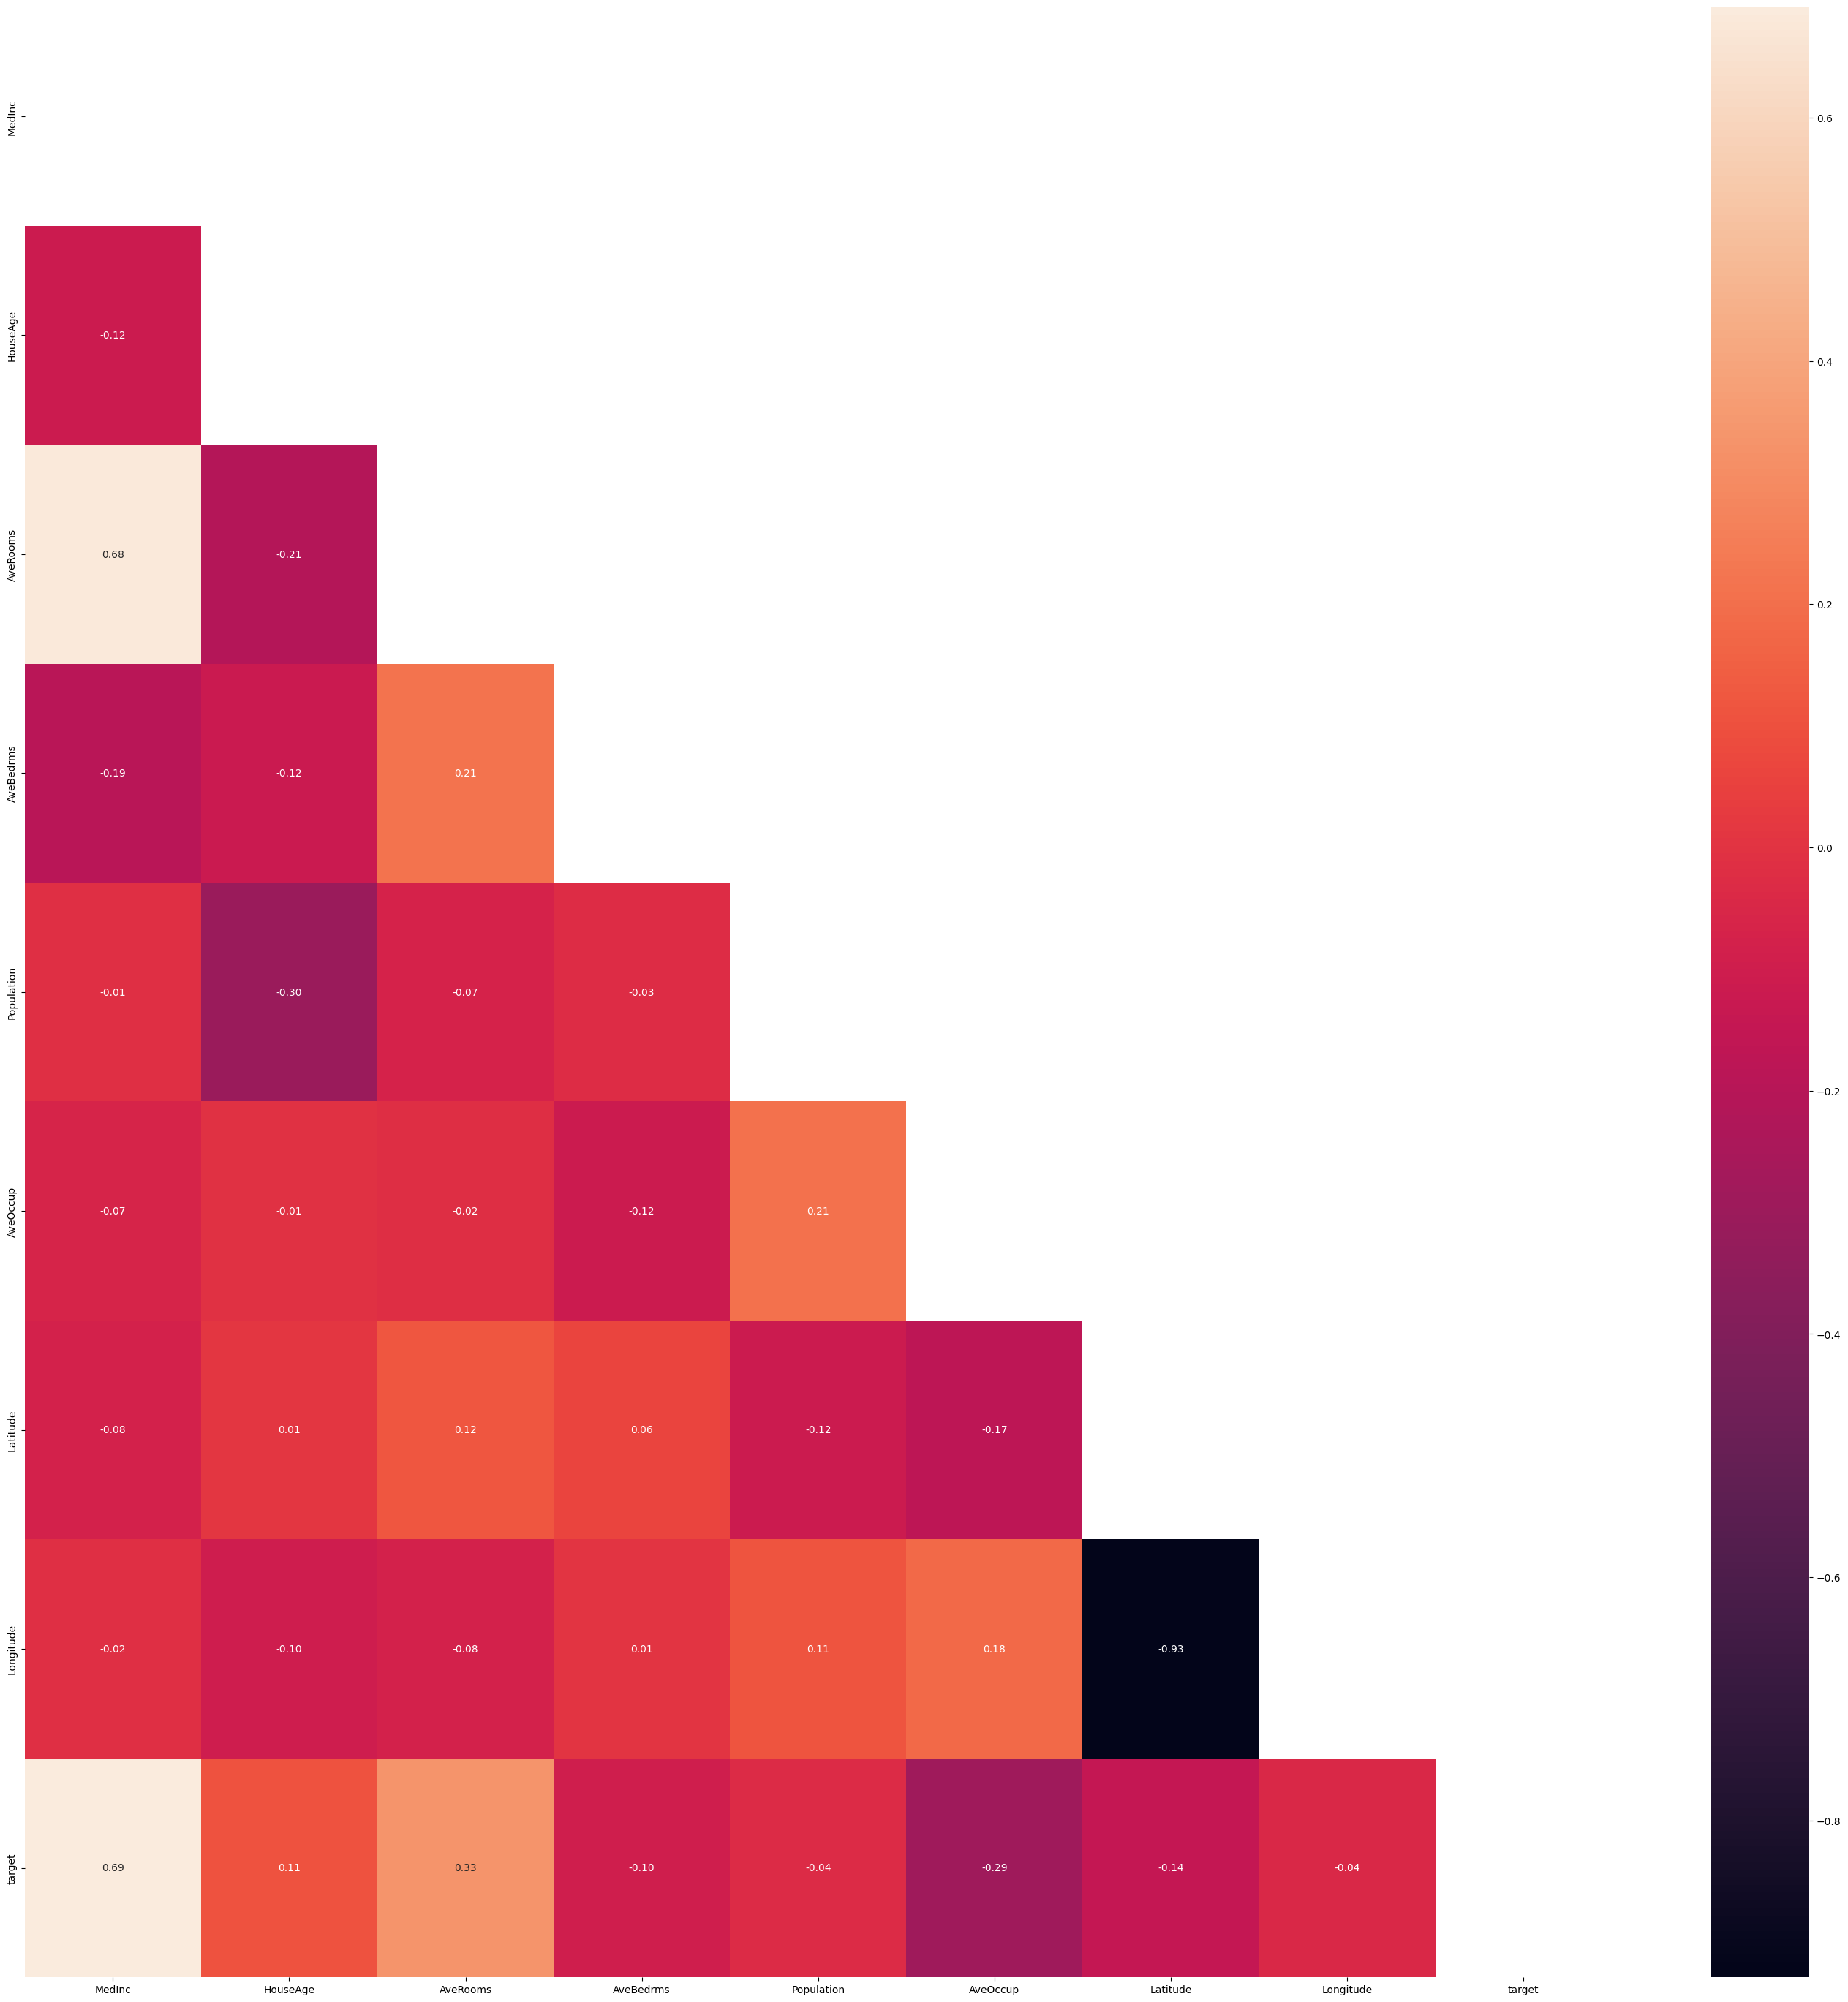

In [120]:
# матрица корреляций для ненормализованных данных
plt.subplots(figsize=(35, 35))
mask = np.triu(np.ones_like(df_filtered.corr(), dtype=bool))
sns.heatmap(df_filtered.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show()

medianIncome сильно коррелирует с целевой переменной

<Axes: xlabel='target', ylabel='MedInc'>

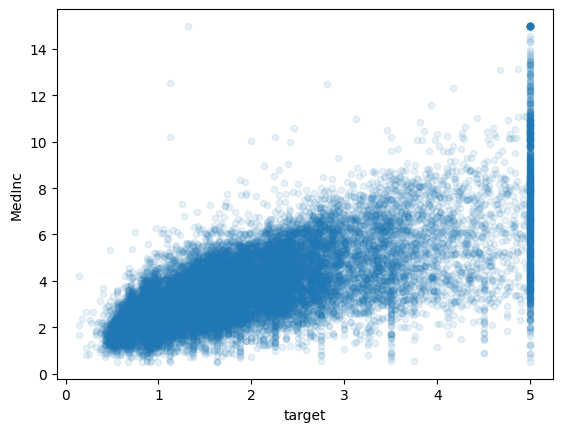

In [121]:
df_filtered.plot(kind='scatter',x='target',y='MedInc',alpha=0.1)

- Произведите масштабирование числовых признаков с помощью подходящего метода нормализации или стандартизации.


In [122]:
# нормализуем данные
X = df_filtered.drop('target', axis=1)
Y = df_filtered['target']
X_scaled = StandardScaler().fit_transform(X)


3. Построение моделей:
   - Разделите данные на обучающую и тестовую выборки.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

- Постройте и обучите модели `RandomForestRegressor` и `GradientBoostingRegressor`.
   - Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

In [124]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rfr_clf = RandomForestRegressor(n_estimators=25,max_depth=5)
rfr_clf.fit(X_train, y_train)
gbr_clf = GradientBoostingRegressor(random_state=42)
gbr_clf.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

4. Оценка моделей:
   - Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).
   



In [125]:
ypredict_rfr=rfr_clf.predict(X_test)
ypredict_gbr=gbr_clf.predict(X_test)


- Сравните результаты моделей, интерпретируйте их.

In [126]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import root_mean_squared_error
# explained_variance_score(y_test,ypredict,multioutput='uniform_average')
print(f"RandomForestRegressor (R2): {r2_score(y_test, ypredict_rfr)}")
print(f"RandomForestRegressor (RMSE): {root_mean_squared_error(y_test, ypredict_rfr)}")
print(f"GradientBoostingRegressor (R2): {r2_score(y_test, ypredict_gbr)}")
print(f"GradientBoostingRegressor (RMSE): {root_mean_squared_error(y_test, ypredict_gbr)}")

RandomForestRegressor (R2): 0.6714204711197012
RandomForestRegressor (RMSE): 0.6721610573597627
GradientBoostingRegressor (R2): 0.7922649487095077
GradientBoostingRegressor (RMSE): 0.5344511142623283


#### градиентный бустинг показывает лучшие предсказания, но по какойто причине RMSE у него ниже.

5. Анализ важности признаков и выводы:
   - Используйте атрибут `feature_importances_` для оценки важности признаков в каждой модели.




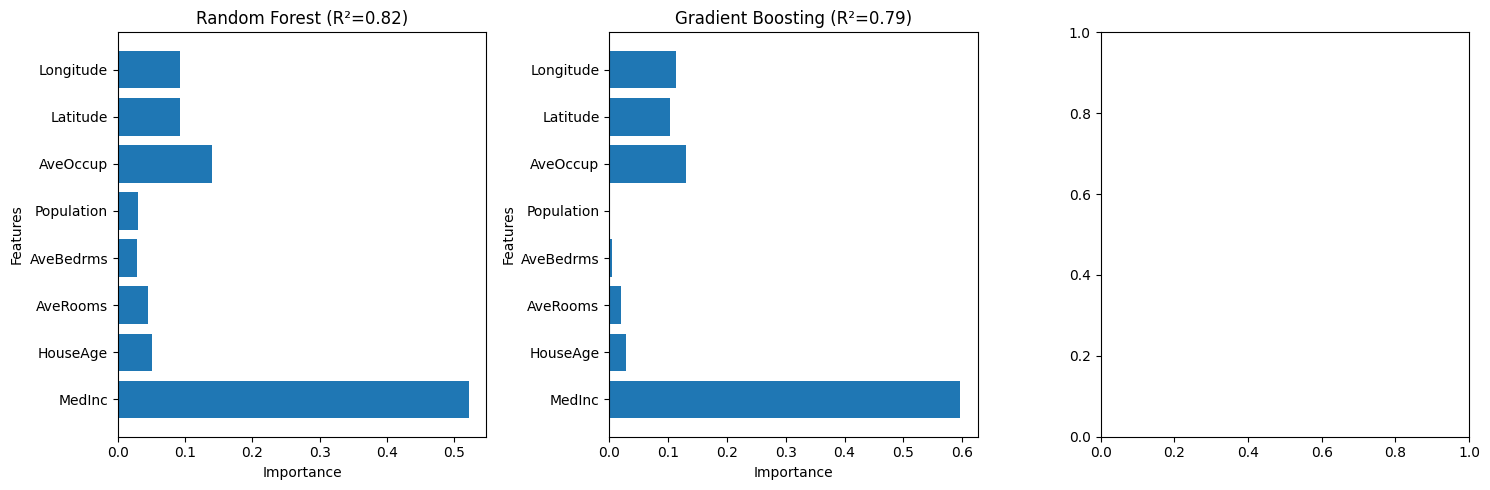

In [127]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Обучение моделей и оценка важности признаков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    feature_importances = model.feature_importances_

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(X.columns)))
    ax.set_yticklabels(X.columns)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()

   - На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

#### наиболее значимыми признаками являются медианный доход (MedInc) и средняя заселености (AveOccup)
***медианный доход соседей и заселенность района логично являются определяющими признаками. Но необходимо отметить, что в оригинальном датасете определяющим является близость к океану (oceanProximity), что частично отображается и в нашем датасете (longitude и latitude)***

6. Дополнительные задачи (для желающих углубить знания):
   - Проведите кросс-валидацию результатов.
   

In [128]:
# обучение random forest и кросс-валидация
from sklearn.ensemble import RandomForestRegressor
rfr_clf = RandomForestRegressor(n_estimators=25,max_depth=5)
rfr_clf.fit(X_train, y_train)
Y_pred_test = rfr_clf.predict(X_test)
scores_dict = dict({})
# Однократная оценка на тестовых данных
single_score = r2_score(Y_pred_test, y_test)
print("Однократная оценка эффективности (R^2):", single_score)
# кросс-валидация на всем датасете
for i in range(2, 20):
    
    cross_val_scores = cross_val_score(rfr_clf, X, Y, cv=i, scoring='r2', )
    scores_dict[i] = cross_val_scores.mean()
    print(f"Среднее значение R^2 по {i}-кратной кросс-валидации:", cross_val_scores.mean())


Однократная оценка эффективности (R^2): 0.46933728956223275
Среднее значение R^2 по 2-кратной кросс-валидации: 0.5285362885963918
Среднее значение R^2 по 3-кратной кросс-валидации: 0.5885848614538448
Среднее значение R^2 по 4-кратной кросс-валидации: 0.5593505219326098
Среднее значение R^2 по 5-кратной кросс-валидации: 0.547573368481845
Среднее значение R^2 по 6-кратной кросс-валидации: 0.5426812308369008
Среднее значение R^2 по 7-кратной кросс-валидации: 0.5319729673946436
Среднее значение R^2 по 8-кратной кросс-валидации: 0.5714311751993997
Среднее значение R^2 по 9-кратной кросс-валидации: 0.5628042533804175
Среднее значение R^2 по 10-кратной кросс-валидации: 0.5299783985725959
Среднее значение R^2 по 11-кратной кросс-валидации: 0.46192156272628204
Среднее значение R^2 по 12-кратной кросс-валидации: 0.29225764670657295
Среднее значение R^2 по 13-кратной кросс-валидации: 0.4996818132343618
Среднее значение R^2 по 14-кратной кросс-валидации: 0.532308029385071
Среднее значение R^2 по 1

KeyboardInterrupt: 

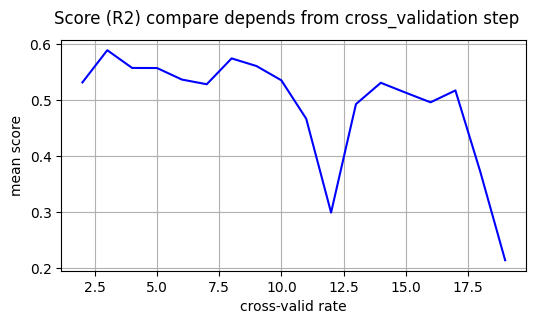

In [106]:
# выведем данные на графики
import matplotlib.pyplot as plt
df_scores2 = pd.DataFrame(columns = ['cv', 'score_mean'])
rows = []
for key, val in scores_dict.items():
    rows.append(dict({'cv': key, 'score_mean': val}))
df_scores2 = df_scores2.from_dict(rows)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
fig.suptitle('Score (R2) compare depends from cross_validation step')
ax.plot(df_scores2['cv'], df_scores2['score_mean'], 'b-')
ax.set_xlabel('cross-valid rate')
ax.set_ylabel('mean score')
ax.grid()
plt.show()

#### при кросс-валидации показатель R2 имеет максимальное значение при разделении данных на три части. При значении параметра =12 точность модели сильно ухудшается до 30%

- Исследуйте влияние удаления некоторых признаков на производительность моделей.

In [132]:
df_filtered.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [141]:
# разобьем данные без нормализации
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
pop_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']
for col in pop_features:
    X = df_filtered.drop('target', axis=1)
    X = X.drop(col, axis=1)
    Y = df_filtered['target']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state = 42)
    rfr_clf = RandomForestRegressor(n_estimators=25,max_depth=5)
    rfr_clf.fit(X_train, y_train)
    gbr_clf = GradientBoostingRegressor(random_state=42)
    gbr_clf.fit(X_train, y_train)
    ypredict_rfr=rfr_clf.predict(X_test)
    ypredict_gbr=gbr_clf.predict(X_test)
    print(f"column '{col}' rejected:")
    print(f"RandomForestRegressor (R2): {r2_score(y_test, ypredict_rfr)}")
    print(f"RandomForestRegressor (RMSE): {root_mean_squared_error(y_test, ypredict_rfr)}")
    print(f"GradientBoostingRegressor (R2): {r2_score(y_test, ypredict_gbr)}")
    print(f"GradientBoostingRegressor (RMSE): {root_mean_squared_error(y_test, ypredict_gbr)}")

column 'MedInc' rejected:
RandomForestRegressor (R2): 0.5113830701928281
RandomForestRegressor (RMSE): 0.8196668125983482
GradientBoostingRegressor (R2): 0.7540714883786044
GradientBoostingRegressor (RMSE): 0.5815104676580438
column 'HouseAge' rejected:
RandomForestRegressor (R2): 0.6579638399749927
RandomForestRegressor (RMSE): 0.6857867771510658
GradientBoostingRegressor (R2): 0.7865646974267868
GradientBoostingRegressor (RMSE): 0.5417341618427308
column 'AveRooms' rejected:
RandomForestRegressor (R2): 0.6841470224800605
RandomForestRegressor (RMSE): 0.6590154308713333
GradientBoostingRegressor (R2): 0.7959960302608013
GradientBoostingRegressor (RMSE): 0.5296297906360188
column 'AveBedrms' rejected:
RandomForestRegressor (R2): 0.6735236976642105
RandomForestRegressor (RMSE): 0.6700063636010699
GradientBoostingRegressor (R2): 0.7944174318953564
GradientBoostingRegressor (RMSE): 0.5316749997361636
column 'Population' rejected:
RandomForestRegressor (R2): 0.6705142204534011
RandomForest

#### при удалении колонок 'AveRooms' или 'AveBedrms' показатели модели улучшаются (незначительно). при удалении других колонок качество моделей ухудшается. Возможно это связано с тем, что колонки 'AveRooms' и 'AveBedrms' имеют высокую степень корреляции и удаление одного из этих признаков не позволяет модели "дублировать" условия